In [1]:
%matplotlib inline

import json
import os

from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import ulmo
from ulmo.util import convert_datetime

/home/mayorga/miniconda/envs/odm2client/lib/python2.7/site-packages/ulmo/twc/kbdi/core.py:20: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  CSV_SWITCHOVER = pandas.tslib.Timestamp('2016-10-01')


In [6]:
portal_pth = "/home/mayorga/Desktop/CZOData-BiGCZ-NOW/2017_11_UserWorkshop/wshp2017_tutorial_content/data"

In [7]:
portal_json_1 = "bigcz-cuahsi-water-slcretbuttecrk-2017-11-15.json"

In [8]:
portalcuahsi_json_pth = os.path.join(portal_pth, portal_json_1)

In [9]:
with open(portalcuahsi_json_pth, 'r') as fj:
    portalcuahsi_json = json.load(fj)

In [10]:
len(portalcuahsi_json)

21

In [11]:
portalcuahsi_json[0].keys()

[u'service_org',
 u'links',
 u'variables',
 u'updated_at',
 u'service_citation',
 u'id',
 u'begin_date',
 u'author',
 u'service_title',
 u'geom',
 u'service_url',
 u'files',
 u'description',
 u'end_date',
 u'details_url',
 u'sample_mediums',
 u'active',
 u'categories',
 u'scimeta',
 u'service_code',
 u'created_at',
 u'title']

In [12]:
portalcuahsi_json[0]

{u'active': False,
 u'author': None,
 u'begin_date': u'2013-06-19T13:45:00Z',
 u'categories': None,
 u'created_at': u'2013-06-19T13:45:00Z',
 u'description': u'iUTAH researchers have developed and deployed an ecohydrologic observatory to study water in \u2018Gradients Along Mountain to Urban Transitions\u2019 (GAMUT). The GAMUT Network measures aspects of climate, hydrology, and water quality along a mountain-to-urban gradient in three watersheds that share common water sources (winter-derived precipitation) but differ in the human and biophysical nature of land-use transitions. GAMUT includes state-of-the-art sensors at aquatic and terrestrial sites for real-time monitoring of common meteorological variables, snow accumulation and melt, soil moisture, surface water flow, and surface water quality.',
 u'details_url': None,
 u'end_date': u'2017-11-03T21:00:00Z',
 u'files': None,
 u'geom': {u'coordinates': [-111.807222, 40.780567], u'type': u'Point'},
 u'id': u'Red Butte Creek GAMUT:RB_A

In [13]:
len(portalcuahsi_json[0]['variables']), portalcuahsi_json[0]['variables'][0]

(71,
 {u'begin_date': u'2013-06-19T20:45:00.000Z',
  u'concept_keyword': u'Barometric pressure',
  u'data_type': u'Average',
  u'end_date': u'2017-11-15T05:00:00.000Z',
  u'id': u'iutah:BP_Avg',
  u'most_recent_value': u'83.3',
  u'name': u'Barometric pressure',
  u'sample_medium': u'Air',
  u'site': u'Red Butte Creek GAMUT:RB_ARBR_C',
  u'speciation': u'Not Applicable',
  u'units': u'kPa',
  u'wsdl': u'http://data.iutahepscor.org/RedButteCreekWOF/cuahsi_1_1.asmx'})

In [14]:
for idx, e in enumerate(portalcuahsi_json):
    if 'NWIS' in e['service_code']:
        print idx, e['id'], e['sample_mediums'], e['begin_date'], e['end_date']

14 NWISDV:10172200 [u'Surface water'] 1963-10-01T00:00:00Z 2017-11-02T00:00:00Z
15 NWISUV:10172200 [u'Surface water'] 1984-02-27T00:00:00Z 2017-11-02T00:00:00Z
16 NWISGW:404506111502401 [u'Groundwater'] 1999-09-23T00:00:00Z 2017-06-30T00:00:00Z
19 NWISDV:10172220 [u'Surface water'] 1979-12-28T00:00:00Z 1991-09-30T00:00:00Z
20 NWISGW:404502111502501 [u'Groundwater'] 1934-10-15T00:00:00Z 1934-10-15T00:00:00Z


In [15]:
# Show a folium map of NWISUV & NWISDV sites together with the sites from the SQLite ODM2 Example 2 sqlite DB?!

In [16]:
for e in portalcuahsi_json:
    print e['id'], e['sample_mediums']

Red Butte Creek GAMUT:RB_ARBR_C [u'Air', u'Not Relevant', u'Other', u'Precipitation', u'Snow', u'Soil']
Red Butte Creek GAMUT:RB_GIRF_C [u'Air', u'Not Relevant', u'Other', u'Precipitation', u'Snow', u'Soil']
Red Butte Creek GAMUT:RB_ARBR_USGS [u'Surface Water']
Red Butte Creek GAMUT:RB_CR_SD [u'Air', u'Not Relevant', u'Storm Water']
Red Butte Creek GAMUT:RB_GIRF_SD [u'Not Relevant', u'Storm Water']
Red Butte Creek GAMUT:RB_CG_BA [u'Not Relevant', u'Surface Water']
Red Butte Creek GAMUT:RB_RBG_BA [u'Not Relevant', u'Surface Water']
Red Butte Creek GAMUT:RB_FortD_SD [u'Not Relevant', u'Storm Water']
Red Butte Creek GAMUT:RB_FD_AA [u'Not Relevant', u'Surface Water']
Red Butte Creek GAMUT:RB_Dent_SD [u'Air', u'Not Relevant', u'Storm Water']
Red Butte Creek GAMUT:RB_ARBR_AA [u'Not Relevant', u'Surface Water']
Red Butte Creek GAMUT:RB_KF_C [u'Air', u'Not Relevant', u'Other', u'Precipitation', u'Snow', u'Soil']
Red Butte Creek GAMUT:RB_LKF_A [u'Not Relevant', u'Surface Water']
Red Butte Creek

In [17]:
def site_series_values_to_df(series_values, variable_name):
    # Create a clean timeseries list of (dt,val) tuples
    tsdt_tuplst = [(convert_datetime(valdict['datetime']).replace(tzinfo=pytz.utc), 
                    float(valdict['value']))
                   for valdict in series_values['values']]
    
    dt, val = zip(*tsdt_tuplst)
    ts_df = pd.DataFrame({'time':dt, variable_name:val})
    ts_df.set_index('time', inplace=True)
    ts_df.sort_index(ascending=True, inplace=True)
    return ts_df

In [18]:
dataset = portalcuahsi_json[14]
dataset

{u'active': False,
 u'author': None,
 u'begin_date': u'1963-10-01T00:00:00Z',
 u'categories': None,
 u'created_at': u'1963-10-01T00:00:00Z',
 u'description': u'The USGS National Water Information System (NWIS) provides access to millions of sites measuring streamflow, groundwater levels, and water quality. This web service provides methods for retrieving daily values data, such as discharge and water levels, from NWIS. For more information about NWIS data services, see http://waterservices.usgs.gov/',
 u'details_url': u'https://waterdata.usgs.gov/nwis/dv/?site_no=10172200',
 u'end_date': u'2017-11-02T00:00:00Z',
 u'files': None,
 u'geom': {u'coordinates': [-111.806045, 40.77994627], u'type': u'Point'},
 u'id': u'NWISDV:10172200',
 u'links': [{u'href': u'http://hiscentral.cuahsi.org/pub_network.aspx?n=1',
   u'type': u'service'},
  {u'href': u'https://waterdata.usgs.gov/nwis/dv/?site_no=10172200',
   u'type': u'details'}],
 u'sample_mediums': [u'Surface water'],
 u'scimeta': None,
 u'se

In [19]:
dataset['variables'][0], dataset['id'], dataset['variables'][0]['id'], dataset['geom']

({u'begin_date': u'',
  u'concept_keyword': u'Discharge, stream',
  u'data_type': u'',
  u'end_date': u'',
  u'id': u'NWISDV:00060/DataType=MEAN',
  u'most_recent_value': None,
  u'name': u'Discharge, cubic feet per second',
  u'sample_medium': u'',
  u'site': u'NWISDV:10172200',
  u'speciation': u'',
  u'units': u'',
  u'wsdl': u'http://hydroportal.cuahsi.org/nwisdv/cuahsi_1_1.asmx'},
 u'NWISDV:10172200',
 u'NWISDV:00060/DataType=MEAN',
 {u'coordinates': [-111.806045, 40.77994627], u'type': u'Point'})

In [20]:
wsdlurl = dataset['variables'][0]['wsdl'] + '?WSDL'
location = dataset['id']
variable = dataset['variables'][0]['id']
variable_name = dataset['variables'][0]['name']

In [21]:
wsdlurl, location, variable, variable_name

(u'http://hydroportal.cuahsi.org/nwisdv/cuahsi_1_1.asmx?WSDL',
 u'NWISDV:10172200',
 u'NWISDV:00060/DataType=MEAN',
 u'Discharge, cubic feet per second')

In [22]:
site_values = ulmo.cuahsi.wof.get_values(wsdlurl, location, variable, 
                                         start=dataset['begin_date'], end=dataset['end_date'])

/home/mayorga/miniconda/envs/odm2client/lib/python2.7/site-packages/ulmo/cuahsi/wof/core.py:170: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  start_datetime = util.convert_datetime(start)
/home/mayorga/miniconda/envs/odm2client/lib/python2.7/site-packages/ulmo/cuahsi/wof/core.py:173: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  end_datetime = util.convert_datetime(end)


In [23]:
ts_df = site_series_values_to_df(site_values, variable_name)
ts_df.tail()

/home/mayorga/miniconda/envs/odm2client/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()


,"Discharge, cubic feet per second"
time,
2017-10-29 00:00:00+00:00,1.51
2017-10-30 00:00:00+00:00,1.51
2017-10-31 00:00:00+00:00,1.51
2017-11-01 00:00:00+00:00,1.53
2017-11-02 00:00:00+00:00,1.51


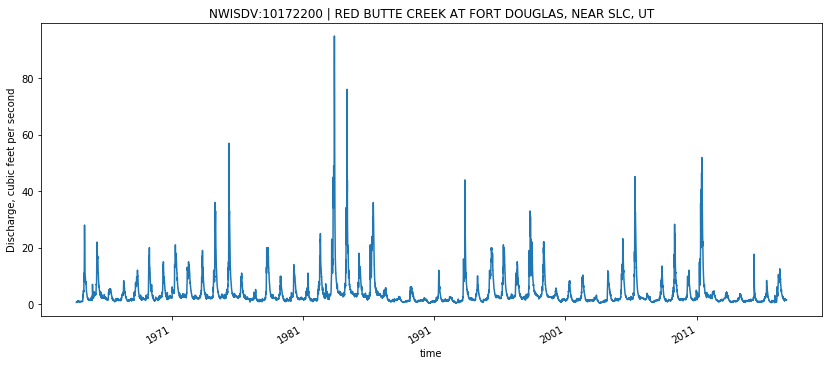

In [24]:
fig, ax = plt.subplots(figsize=(14, 6))
varlabel = ts_df.columns[0]
ts_df[varlabel].plot(style='-', ax=ax)
ax.set_ylabel(varlabel)
ax.set_title("{} | {}".format(dataset['id'], dataset['title']));